# Importing Packages

In [1]:
# General Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


# Perceptron
from sklearn.linear_model import Perceptron # This module (perceptron) has a bunch of hyperparameters 

# # Neural Networks
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F

# Metrics
from sklearn import model_selection
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import mean_squared_error


# EDA and Pre-processing

In [2]:
df_og = pd.read_csv("/Users/hamzaalshamy/Desktop/NYU/2024/Spring 2024/FML/Homeworks/Homework 3/diabetes.csv")
data = df_og.to_numpy()
df_og.head()

,Diabetes,HighBP,HighChol,BMI,Smoker,Stroke,Myocardial,PhysActivity,Fruit,Vegetables,...,NotAbleToAffordDoctor,GeneralHealth,MentalHealth,PhysicalHealth,HardToClimbStairs,BiologicalSex,AgeBracket,EducationBracket,IncomeBracket,Zodiac
0,0,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,1,9,4,3,10
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,1,7,6,1,11
2,0,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,1,9,4,8,2
3,0,1,0,27,0,0,0,1,1,1,...,0,2,0,0,0,1,11,3,6,11
4,0,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,1,11,5,4,8


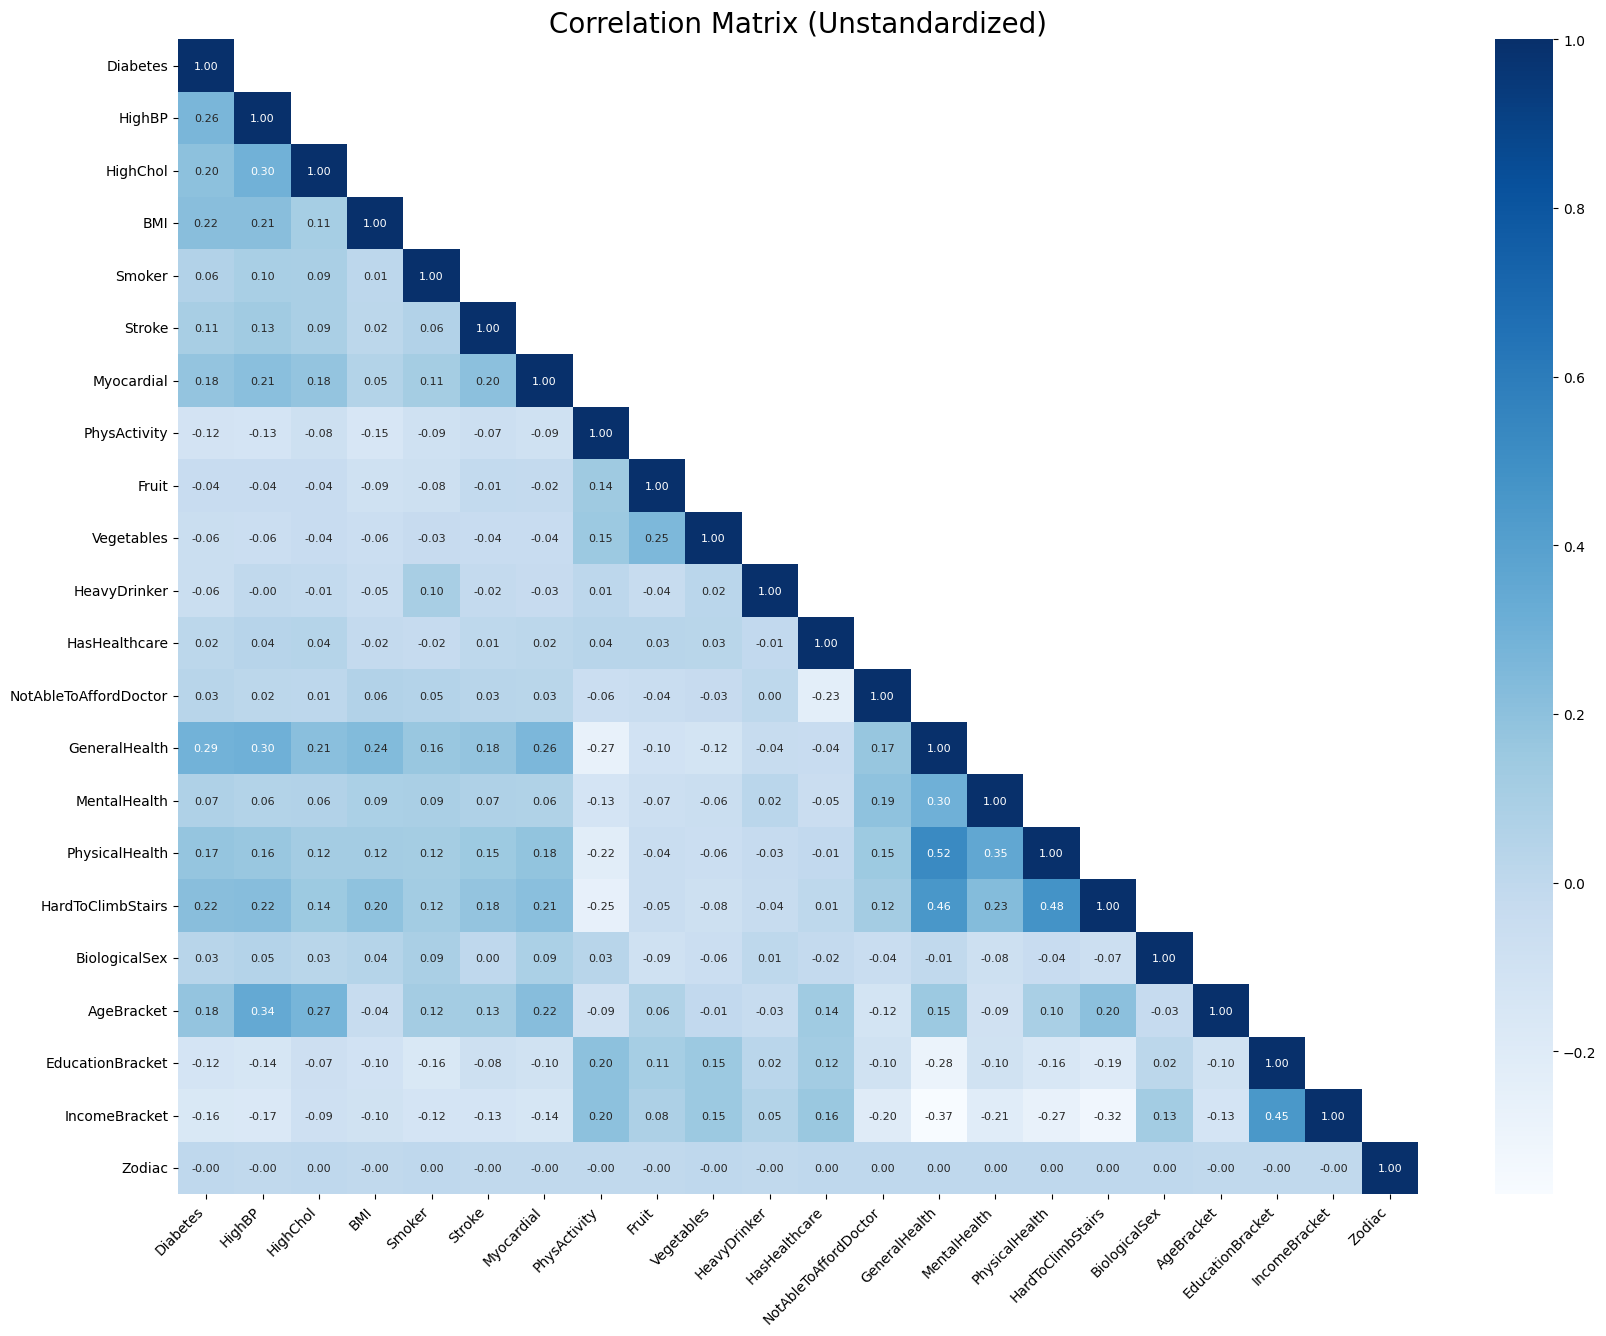

In [3]:
correlation_matrix = pd.DataFrame(df_og).corr()

# Generate a mask for the upper triangle without the diagonal
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

# Increase the figure size
plt.figure(figsize=(20, 15))

# Create the heatmap with the mask, keeping the diagonal visible
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cbar=True, cmap="Blues", annot_kws={'size': 8}, mask=mask)

# Title
plt.title('Correlation Matrix (Unstandardized)', fontsize=20)

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=45, ha="right", fontsize=10)

# Rotate y-axis tick labels for better readability
plt.yticks(fontsize=10)

# Show plot
plt.show()

# Question 1: Perceptron

In [4]:
# Separate features and target
X = df_og.iloc[:, 1:].values  # All columns except the first one (features)
y = df_og.iloc[:, 0].values  # Only the first column (target: diabetes status)

# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

# Initialize and train the Perceptron model with explicit shuffle
perceptron_model = Perceptron(max_iter=1000, tol=1e-3, random_state=42, shuffle=True, class_weight= "balanced")
perceptron_model.fit(X_train, y_train)

# Model evaluation using AUC
y_scores = perceptron_model.decision_function(X_test)
auc_score_decision_function = roc_auc_score(y_test, y_scores)
print(f"AUC Score using decision function: {round(auc_score_decision_function,3)}")

# Generate binary predictions for MCC calculation
y_pred = perceptron_model.predict(X_test)

# Calculate Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient: {round(mcc, 3)}\n")

# Model evaluation using accuracy
accuracy_test = perceptron_model.score(X_test, y_test)
print(f"Accuracy on test set: {round(accuracy_test, 3)}")

# Calculate and print accuracy on the training set
accuracy_training = perceptron_model.score(X_train, y_train)
print(f"Accuracy on training set: {round(accuracy_training, 3)}")


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
AUC Score using decision function: 0.648
Matthews Correlation Coefficient: 0.16

Accuracy on test set: 0.609
Accuracy on training set: 0.61


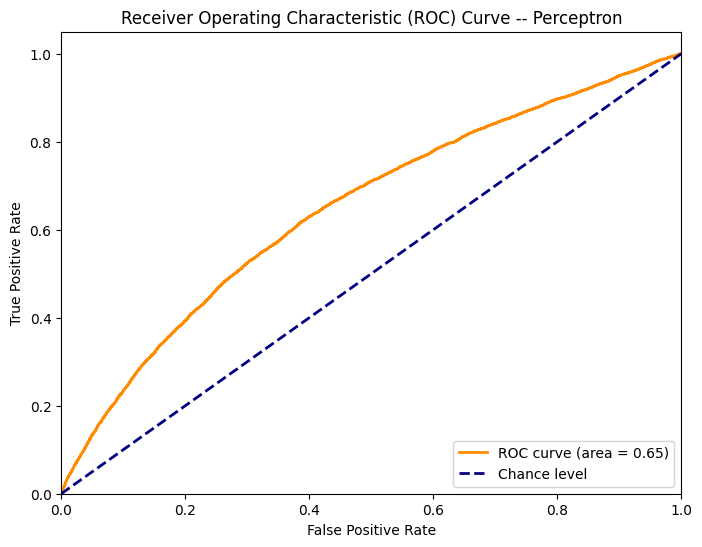

In [5]:
# Compute ROC curve values: FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_score_decision_function:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance level')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve -- Perceptron')
plt.legend(loc="lower right")
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.61      0.73     43739
           1       0.20      0.62      0.31      6997

    accuracy                           0.61     50736
   macro avg       0.56      0.61      0.52     50736
weighted avg       0.81      0.61      0.67     50736



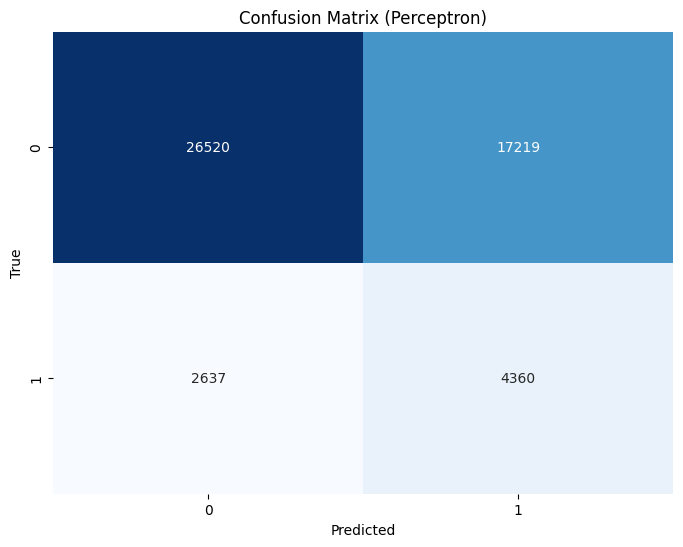

In [6]:
# Generate binary predictions
y_pred = perceptron_model.predict(X_test)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualization of Confusion Matrix using Seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Perceptron)')
plt.show()

# Question 2: Feedforward Neural Network (Diabetes Classification)

In [7]:
# Defining the models

def create_model(n_hidden_layers, activation, input_size):
    layers = [nn.Linear(input_size, 10)]
    for _ in range(n_hidden_layers):
        if activation == 'relu':
            layers.append(nn.ReLU())
        elif activation == 'sigmoid':
            layers.append(nn.Sigmoid())
        layers.append(nn.Linear(10, 10))
    layers.append(nn.Linear(10, 1))
    return nn.Sequential(*layers)

def train_model(model, X_train, y_train, X_test, y_test, epochs=100):
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    X_train, y_train = torch.FloatTensor(X_train), torch.FloatTensor(y_train)
    X_test, y_test = torch.FloatTensor(X_test), torch.FloatTensor(y_test)

    for epoch in range(epochs):
        optimizer.zero_grad()
        output = model(X_train)
        loss = criterion(output.squeeze(), y_train)
        loss.backward()
        optimizer.step()
    
    # Evaluate the model
    with torch.no_grad():
        y_pred_train = torch.sigmoid(model(X_train)).squeeze()
        y_pred_test = torch.sigmoid(model(X_test)).squeeze()
    
    # Convert predictions to binary
    y_pred_train_bin = (y_pred_train > 0.5).numpy()
    y_pred_test_bin = (y_pred_test > 0.5).numpy()
    
    # Calculate metrics
    auc = roc_auc_score(y_test.numpy(), y_pred_test.numpy())
    mcc = matthews_corrcoef(y_test.numpy(), y_pred_test_bin)
    acc_train = accuracy_score(y_train.numpy(), y_pred_train_bin)
    acc_test = accuracy_score(y_test.numpy(), y_pred_test_bin)
    
    return auc, mcc, acc_train, acc_test

In [8]:
activations = ['relu', 'sigmoid', None]
n_hidden_layers_options = [1, 2, 3, 4, 5]  # Example: up to 5 hidden layers
results = []

results = []
for activation in activations:
    for n_hidden_layers in n_hidden_layers_options:
        model = create_model(n_hidden_layers, activation, X_train.shape[1])
        auc, mcc, acc_train, acc_test = train_model(model, X_train, y_train, X_test, y_test)
        results.append({
            'Activation Function': activation if activation else 'None',
            'Number of Hidden Layers': n_hidden_layers,
            'AUC': auc,
            'MCC': mcc,
            'Training Accuracy': acc_train,
            'Testing Accuracy': acc_test
        })


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [9]:
# Converting the results list, which is now a list of dictionaries, to a DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
results_df

,Activation Function,Number of Hidden Layers,AUC,MCC,Training Accuracy,Testing Accuracy
0,relu,1,0.561541,0.000000,0.860311,0.862090
1,relu,2,0.608563,-0.002511,0.860311,0.862051
2,relu,3,0.566039,0.000000,0.860311,0.862090
3,relu,4,0.469830,0.000000,0.860311,0.862090
4,relu,5,0.488194,0.000000,0.860311,0.862090
5,sigmoid,1,0.604075,0.000000,0.860311,0.862090
6,sigmoid,2,0.538970,0.000000,0.860311,0.862090
7,sigmoid,3,0.361270,0.000000,0.860311,0.862090
8,sigmoid,4,0.487039,0.000000,0.860311,0.862090
9,sigmoid,5,0.700800,0.000000,0.860311,0.862090


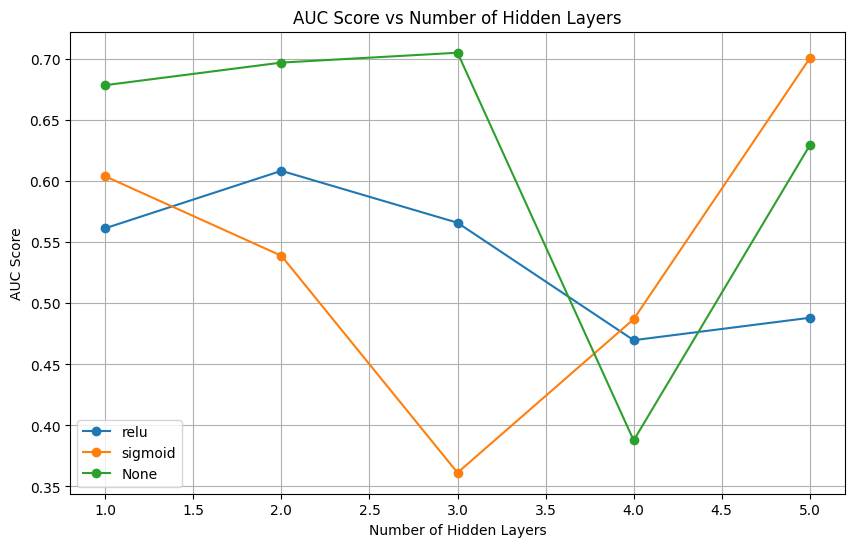

In [10]:
# Plotting AUC Scores by Number of Hidden Layers for each Activation Function
plt.figure(figsize=(10, 6))
for activation in activations:
    # Filter and plot each activation's results
    filtered_df = results_df[results_df['Activation Function'] == (activation if activation else 'None')]
    plt.plot(filtered_df['Number of Hidden Layers'], filtered_df['AUC'], label=activation if activation else "None", marker='o')

plt.xlabel('Number of Hidden Layers')
plt.ylabel('AUC Score')
plt.title('AUC Score vs Number of Hidden Layers')
plt.legend()
plt.grid(True)
plt.show()

# Question 3: Deep Netwrok (At least two hidden layers)

In [11]:
class DiabetesClassifier(nn.Module):
    def __init__(self, input_dim):
        super(DiabetesClassifier, self).__init__()
        self.layer1 = nn.Linear(input_dim, 128)     # Hidden Layer 1
        self.layer2 = nn.Linear(128, 64)            # Hidden Layer 2
        self.layer3 = nn.Linear(64, 32)             # Hidden Layer 3
        self.output_layer = nn.Linear(32, 1)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        x = self.output_layer(x)
        return x

# Prepare the data
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train).view(-1, 1)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test).view(-1, 1)

# Initialize model, loss, and optimizer
model = DiabetesClassifier(X_train.shape[1])
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(100):  # Adjust the number of epochs according to the dataset and needs
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred_train = torch.sigmoid(model(X_train_tensor)).squeeze()
    y_pred_test = torch.sigmoid(model(X_test_tensor)).squeeze()

# Convert predictions to binary
y_pred_test_bin = (y_pred_test > 0.5).numpy()
y_train_pred_bin = (y_pred_train > 0.5).numpy()

# Calculate metrics
auc = roc_auc_score(y_test, y_pred_test.numpy())
accuracy_test = accuracy_score(y_test, y_pred_test_bin)
mcc = matthews_corrcoef(y_test, y_pred_test_bin)

accuracy_train = accuracy_score(y_train, y_train_pred_bin)


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [12]:
# Print metrics
print(f"AUC Score: {auc:.3f}")
print(f"Matthews Correlation Coefficient: {mcc:.3f}\n")

print(f"Test Accuracy: {accuracy_test:.3f}")
print(f"Training Accuracy: {accuracy_train:.3f}")

AUC Score: 0.826
Matthews Correlation Coefficient: 0.092

Test Accuracy: 0.863
Training Accuracy: 0.862


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


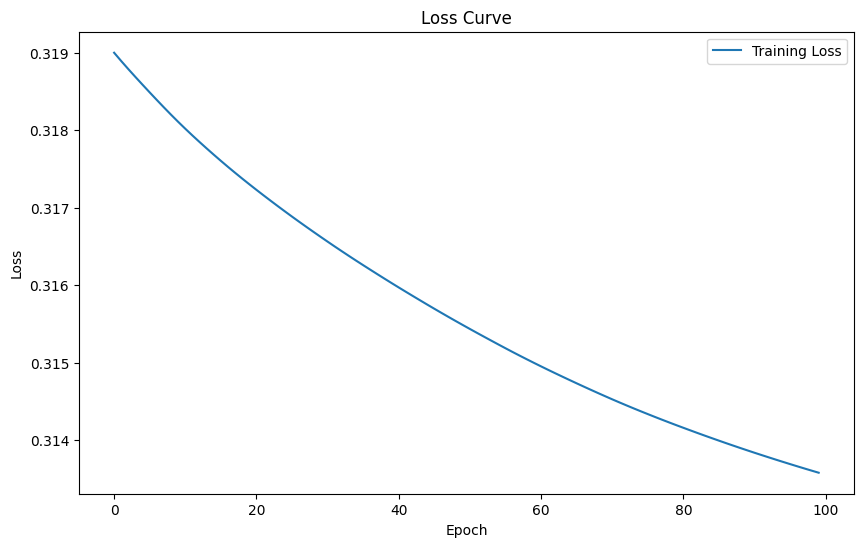

In [13]:
# Adjust the training loop to store loss values
losses = []
for epoch in range(100):
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    losses.append(loss.item())
    loss.backward()
    optimizer.step()

# Plotting the loss curve
plt.figure(figsize=(10, 6))
plt.plot(losses, label='Training Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


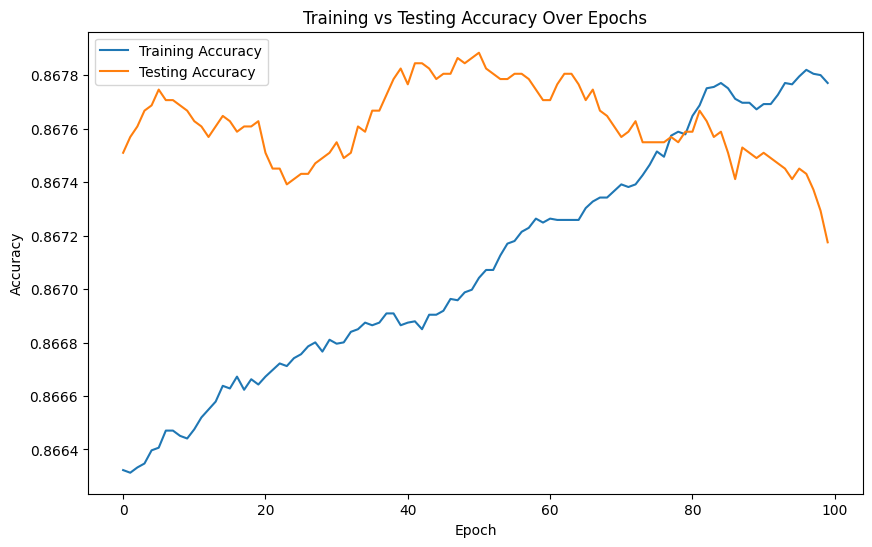

In [14]:
# Modify the training loop to calculate accuracy at each epoch
train_accuracies = []
test_accuracies = []

for epoch in range(100):
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred_train = torch.sigmoid(model(X_train_tensor)).squeeze()
        y_pred_test = torch.sigmoid(model(X_test_tensor)).squeeze()
        train_accuracy = accuracy_score(y_train, (y_pred_train > 0.5).numpy())
        test_accuracy = accuracy_score(y_test, (y_pred_test > 0.5).numpy())
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plotting accuracies
plt.figure(figsize=(10, 6))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(test_accuracies, label='Testing Accuracy')
plt.title('Training vs Testing Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93     43739
           1       0.65      0.02      0.04      6997

    accuracy                           0.86     50736
   macro avg       0.76      0.51      0.48     50736
weighted avg       0.83      0.86      0.80     50736



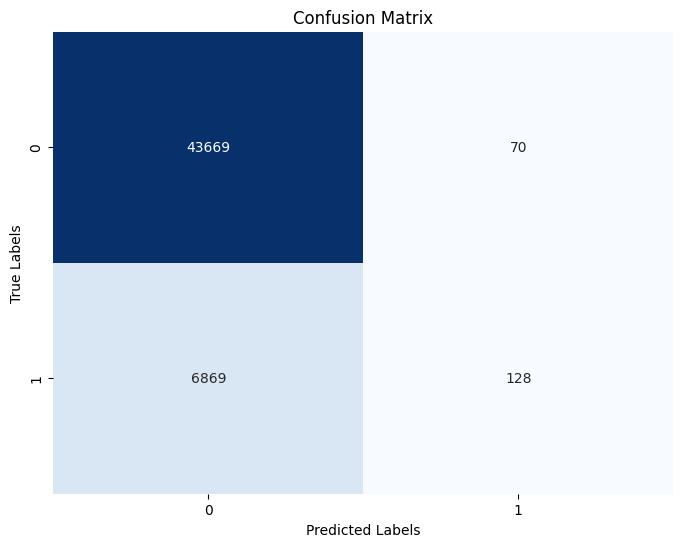

In [15]:
print("Classification Report:")
report = classification_report(y_test, y_pred_test_bin)
print(report)

cm = confusion_matrix(y_test, y_pred_test_bin)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


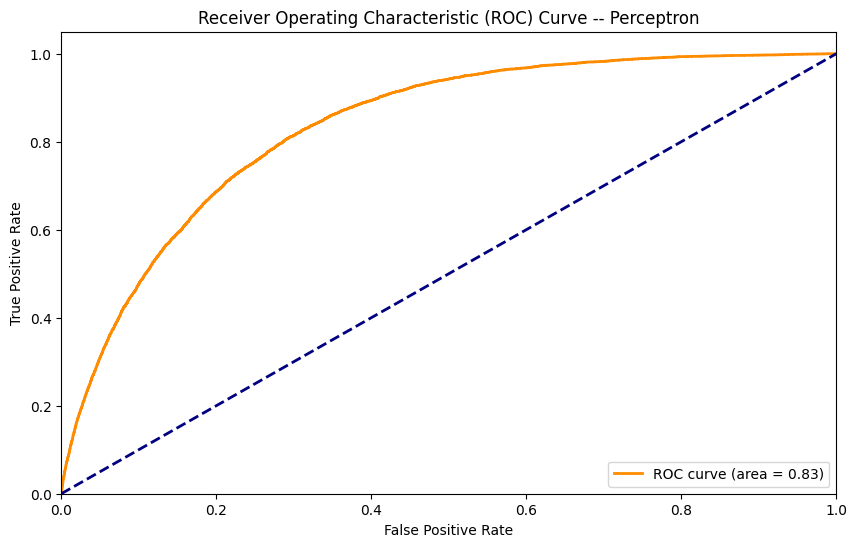

In [16]:
from sklearn.metrics import roc_curve, auc  # Re-import to ensure auc is not overwritten

# Generating ROC curve data
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test.numpy())
roc_auc = auc(fpr, tpr)  # Ensuring auc is used as a function

# Plotting the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve -- Perceptron')
plt.legend(loc="lower right")
plt.show()

# Question 4: Feedforward Neural Network (BMI Prediction)

In [17]:
# Creating new input features and outcome from the original dataframe
X2 = df_og.drop(columns=['BMI'])
y2 = df_og['BMI'].values

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Standardizing the outcome ----- OPTIONAL
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()


# Converting to PyTorch tensors
X_train_tensor2 = torch.FloatTensor(X_train)
# y_train_tensor2 = torch.FloatTensor(y_train).view(-1, 1)
X_test_tensor2 = torch.FloatTensor(X_test)
# y_test_tensor2 = torch.FloatTensor(y_test).view(-1, 1)

# Convert to PyTorch tensors
y_train_tensor2 = torch.FloatTensor(y_train_scaled).view(-1, 1)
y_test_tensor2 = torch.FloatTensor(y_test_scaled).view(-1, 1)

In [18]:
# Defining

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, activation_fn=None):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.activation_fn = activation_fn

    def forward(self, x):
        x = self.fc1(x)
        if self.activation_fn is not None:
            x = self.activation_fn(x)
        x = self.fc2(x)
        return x

def create_model(input_size, activation='relu'):
    hidden_size = 128
    output_size = 1
    if activation == 'relu':
        activation_fn = nn.ReLU()
    elif activation == 'sigmoid':
        activation_fn = nn.Sigmoid()
    else:
        activation_fn = None
    return SimpleNN(input_size, hidden_size, output_size, activation_fn)


# Training Function
def train_and_evaluate(model, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, epochs=100):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        predictions = model(X_test_tensor)
        rmse = torch.sqrt(criterion(predictions, y_test_tensor)).item()
    return rmse

In [19]:
activations = ['relu', 'sigmoid', 'none']
results = []

input_size = X_train.shape[1]
for activation in activations:
    model = create_model(input_size, activation)
    rmse = train_and_evaluate(model, X_train_tensor2, y_train_tensor2, X_test_tensor2, y_test_tensor2)
    results.append({'Activation': activation, 'RMSE': rmse})

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [20]:
results_df


,Activation,RMSE
0,relu,0.904400
1,sigmoid,0.923399
2,none,0.926049


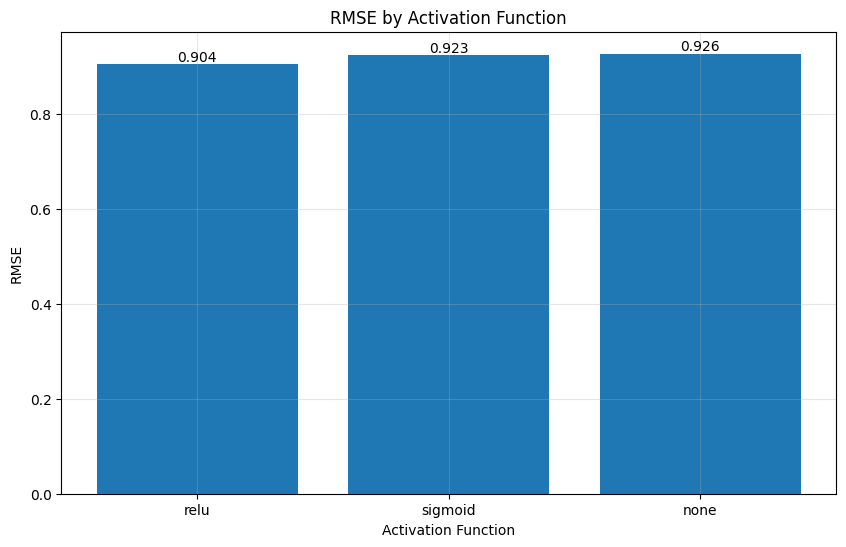

In [21]:
# Plotting RMSE for different activation functions
plt.figure(figsize=(10, 6))
bars = plt.bar(results_df['Activation'], results_df['RMSE'])
plt.xlabel('Activation Function')
plt.ylabel('RMSE')
plt.title('RMSE by Activation Function')
plt.grid(alpha=0.3)

# Adding the text on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')

plt.show()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


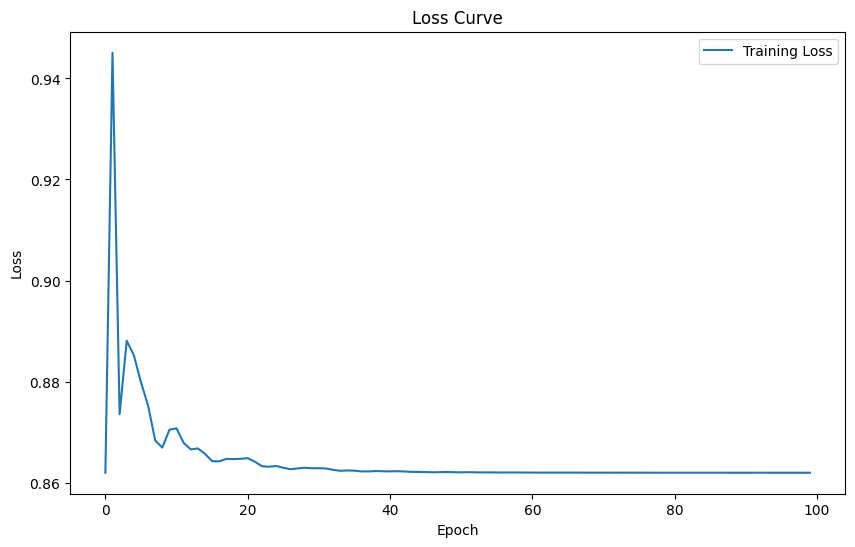

In [22]:
def train_and_evaluate(model, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, epochs=100):
    criterion = nn.MSELoss()  # Loss function for regression
    optimizer = optim.Adam(model.parameters(), lr=0.01)  # Optimizer
    losses = []  # List to store loss per epoch for tracking

    for epoch in range(epochs):
        model.train()  # Set model to training mode
        optimizer.zero_grad()  # Clear gradients
        outputs = model(X_train_tensor)  # Get model outputs
        loss = criterion(outputs, y_train_tensor)  # Compute loss
        losses.append(loss.item())  # Save the loss for this epoch
        loss.backward()  # Compute gradients
        optimizer.step()  # Update weights

    # After training, evaluate the model on the test data
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():  # Turn off gradients for validation, saves memory and computations
        predictions = model(X_test_tensor)  # Get predictions
        rmse = torch.sqrt(criterion(predictions, y_test_tensor)).item()  # Calculate RMSE

    return losses, rmse, predictions

# Assuming model training includes capturing losses
# Call train_and_evaluate and unpack returned values correctly
losses, rmse, predictions = train_and_evaluate(model, X_train_tensor2, y_train_tensor2, X_test_tensor2, y_test_tensor2)

# Now, plot the training losses
plt.figure(figsize=(10, 6))
plt.plot(losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()


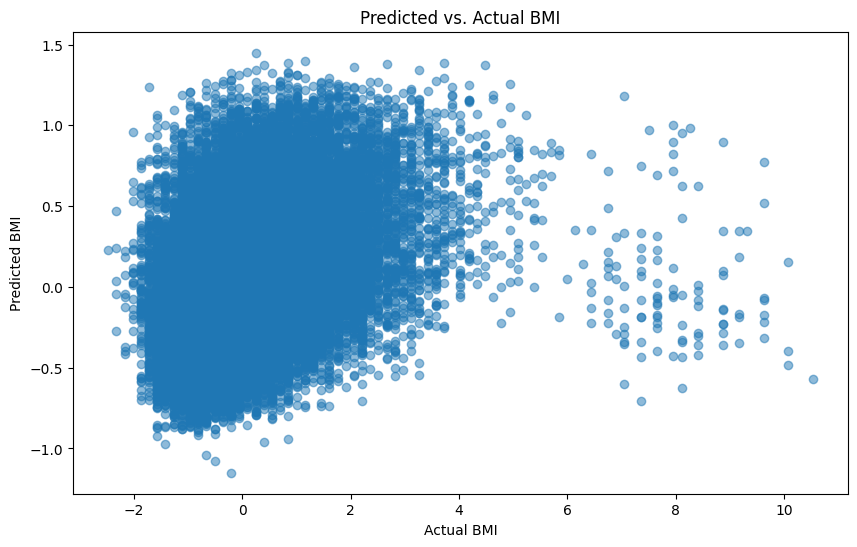

In [23]:
# Assume predictions and actuals are collected after model evaluation
plt.figure(figsize=(10, 6))
plt.scatter(y_test_tensor2.numpy(), predictions.numpy(), alpha=0.5)
plt.xlabel('Actual BMI')
plt.ylabel('Predicted BMI')
plt.title('Predicted vs. Actual BMI')
# plt.plot([y_test_tensor2.min(), y_test_tensor2.max()], [y_test_tensor2.min(), y_test_tensor2.max()], 'k--', lw=4)
plt.show()


# Question 5: Neural Network (BMI Prediction)

In [24]:
class DynamicNN(nn.Module):
    def __init__(self, input_size, num_layers, activation_fn):
        """
        Initialize the DynamicNN class with specified number of hidden layers and activation function.

        Args:
            input_size (int): The number of input features.
            num_layers (int): The number of hidden layers in the network.
            activation_fn (torch.nn.modules.activation): The activation function to apply after each hidden layer.
        """
        super(DynamicNN, self).__init__()
        # Creating a list of hidden layers dynamically.
        # The first layer takes the input size, and each subsequent layer takes the output of the previous layer (128 units here).
        self.layers = nn.ModuleList([nn.Linear(input_size if i == 0 else 128, 128) for i in range(num_layers)])
        # Final output layer that maps from the last hidden layer to the output feature (1 unit in this case).
        self.final = nn.Linear(128, 1)
        self.activation_fn = activation_fn

    def forward(self, x):
        """
        Defines the computation performed at every call of the model.

        Args:
            x (Tensor): The input data.

        Returns:
            Tensor: The output of the network after passing through the hidden layers and the output layer.
        """
        # Iterate through each layer and apply the activation function if it is not None.
        for layer in self.layers:
            x = layer(x)
            if self.activation_fn:
                x = self.activation_fn(x)
        # The final layer output, which is typically used for regression tasks.
        x = self.final(x)
        return x

def train_and_evaluate(model, X_train, y_train, X_test, y_test, epochs=20):
    """
    Trains and evaluates the neural network model.

    Args:
        model (DynamicNN): The neural network model to train.
        X_train (Tensor): Training data features.
        y_train (Tensor): Training data targets.
        X_test (Tensor): Test data features.
        y_test (Tensor): Test data targets.
        epochs (int): Number of epochs to train the model.

    Returns:
        float: The root mean square error of the model on the test dataset.
    """
    # Loss function for regression (Mean Squared Error).
    criterion = nn.MSELoss()
    # Optimizer for updating weights (Adam in this case).
    optimizer = optim.Adam(model.parameters(), lr=0.01)

    # Training loop over the specified number of epochs.
    for epoch in range(epochs):
        model.train()  # Set the model to training mode (important for things like dropout and batchnorm).
        optimizer.zero_grad()  # Clear gradients before each backward pass.
        outputs = model(X_train)  # Forward pass.
        loss = criterion(outputs, y_train)  # Calculate loss.
        loss.backward()  # Compute gradients.
        optimizer.step()  # Update model parameters.

    # Evaluate the model on test data after training.
    model.eval()  # Set the model to evaluation mode.
    with torch.no_grad():  # Turn off gradients to save memory and computations.
        predictions = model(X_test)
        rmse = torch.sqrt(criterion(predictions, y_test)).item()  # Calculate RMSE.

    return rmse

In [25]:
# Configuration options for activations
activations = {'none': None, 'sigmoid': nn.Sigmoid(), 'relu': nn.ReLU(), 'softplus': nn.Softplus()}
results_q5 = []

# Run experiments
for activation_name, activation_fn in activations.items():
    for num_layers in range(1, 9):  # 1 to 8 hidden layers
        model = DynamicNN(X_train_tensor2.shape[1], num_layers, activation_fn)
        rmse = train_and_evaluate(model, X_train_tensor2, y_train_tensor2, X_test_tensor2, y_test_tensor2)
        results_q5.append({
            'Activation': activation_name,
            'Hidden Layers': num_layers,
            'RMSE': rmse
        })
        print(f'Activation: {activation_name}, Layers: {num_layers}, RMSE: {rmse}')

# Convert results to DataFrame for better visualization and analysis
results_df_q5 = pd.DataFrame(results_q5)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [26]:
results_df_q5

,Activation,Hidden Layers,RMSE
0,none,1,0.929248
1,none,2,0.935323
2,none,3,0.947022
3,none,4,0.944702
4,none,5,0.961595
5,none,6,1.230445
6,none,7,1.527452
7,none,8,1.037264
8,sigmoid,1,0.939373
9,sigmoid,2,0.983068


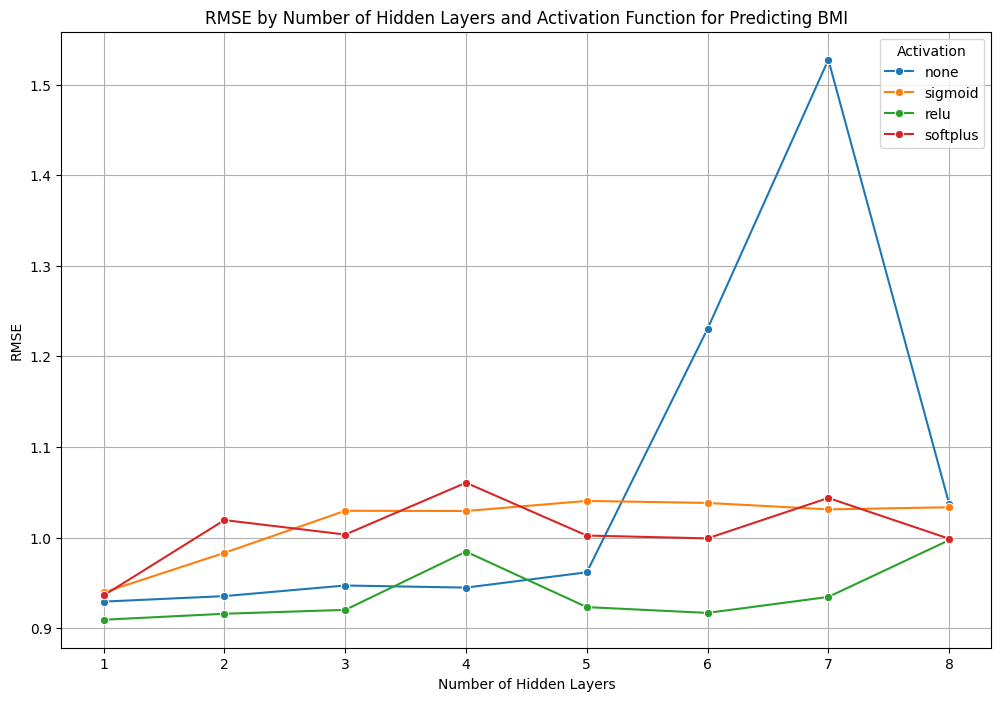

In [27]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=results_df_q5, x='Hidden Layers', y='RMSE', hue='Activation', marker='o')
plt.title('RMSE by Number of Hidden Layers and Activation Function for Predicting BMI')
plt.xlabel('Number of Hidden Layers')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

# Extra Credit

## Part a

In [30]:
X = df_og.iloc[:, 1:].values  # All columns except the first one (features)
y = df_og.iloc[:, 0].values  # Only the first column (target: diabetes status)

# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

# Dictionary to hold AUC scores when each feature is dropped
auc_scores = {}

# Loop through each feature index
for idx in range(X_train.shape[1]):
    # Use numpy to delete the column from X_train and X_test
    X_train_dropped = np.delete(X_train, idx, axis=1)
    X_test_dropped = np.delete(X_test, idx, axis=1)
    
    # Initialize and train the Perceptron model
    perceptron_model = Perceptron(max_iter=1000, tol=1e-3, random_state=42, shuffle=True, class_weight="balanced")
    perceptron_model.fit(X_train_dropped, y_train)
    
    # Get the decision function scores
    y_scores_dropped = perceptron_model.decision_function(X_test_dropped)
    
    # Calculate the AUC
    auc_score_dropped = roc_auc_score(y_test, y_scores_dropped)
    
    # Store the AUC score in the dictionary using the column index as key
    auc_scores[df_og.columns[idx + 1]] = auc_score_dropped  # +1 to account for target column at index 0


In [31]:
# Find the feature whose removal least affects the AUC
least_important_feature = max(auc_scores, key=auc_scores.get)
smallest_impact = auc_scores[least_important_feature]

# Convert the AUC scores dictionary to a DataFrame
auc_scores_df = pd.DataFrame(list(auc_scores.items()), columns=['Feature', 'AUC'])

# Sort the DataFrame by AUC scores in descending order for better visualization
auc_scores_df_sorted = auc_scores_df.sort_values(by='AUC', ascending=False)

In [36]:
auc_scores_df_sorted.sort_values(by="AUC", ascending= True)

,Feature,AUC
14,PhysicalHealth,0.622147
0,HighBP,0.657943
12,GeneralHealth,0.690835
19,IncomeBracket,0.709569
13,MentalHealth,0.712183
8,Vegetables,0.712851
20,Zodiac,0.720770
2,BMI,0.721243
1,HighChol,0.723139
9,HeavyDrinker,0.725514


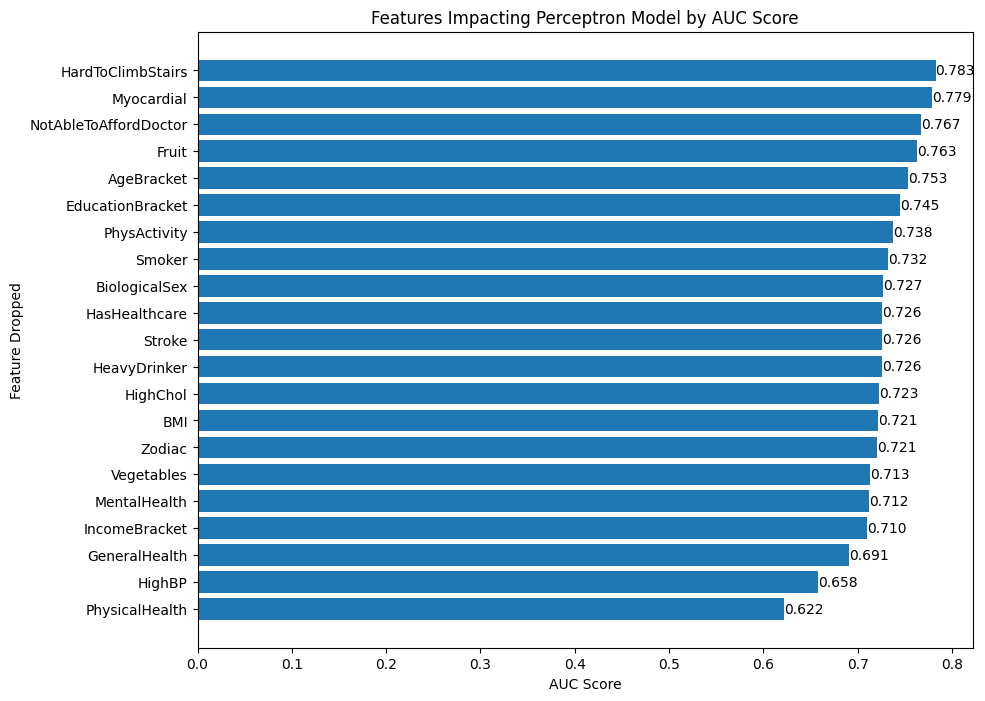

In [47]:
# Plotting
plt.figure(figsize=(10, 8))
bars = plt.barh(auc_scores_df_sorted['Feature'], auc_scores_df_sorted['AUC'])
plt.xlabel('AUC Score')
plt.ylabel('Feature Dropped')
plt.title('Features Impacting Perceptron Model by AUC Score')
plt.gca().invert_yaxis()  # Invert y axis for better readability

# Add text annotations to the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.3f}',
             va='center', ha='left')

plt.show()

## Part b

For this question, I used the resluts from HW 3 and results from previous parts of this HW. An extensive discussion can be found in the PDF report.